In [1]:
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use('seaborn')

## Linear Regression

### Normal Equation

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)

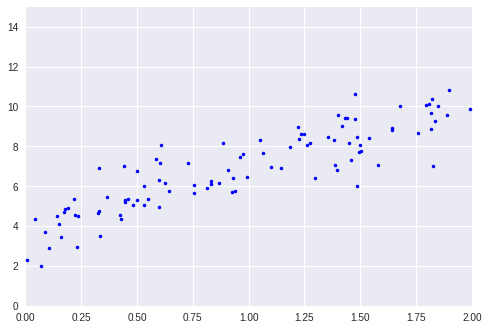

In [3]:
plt.plot(X, y, "b.");
plt.axis([0,2,0,15]);

In [4]:
X.T.shape

(1, 100)

In [5]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[3.85607585],
       [3.14665119]])

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.85607585],
       [10.14937823]])

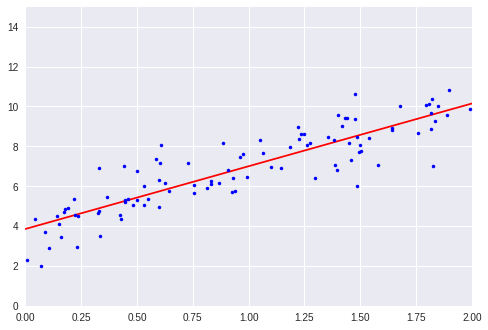

In [8]:
plt.plot(X_new, y_predict, "r-");
plt.plot(X,y, "b.")
plt.axis([0,2,0,15]);

With Scikit-Learn:

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.85607585]), array([[3.14665119]]))

In [10]:
lin_reg.predict(X_new)

array([[ 3.85607585],
       [10.14937823]])

## Gradient Descent

### Batch Gradient Descent

In [11]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random init.

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [12]:
theta

array([[3.85607585],
       [3.14665119]])

### Stochastic Gradient Descent

In [13]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [14]:
theta

array([[3.85538355],
       [3.1167178 ]])

In [15]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [16]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.80800853]), array([3.1042255]))

## Polynomial Regression

In [17]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

(-3.0, 3.0, 0.0, 10.0)

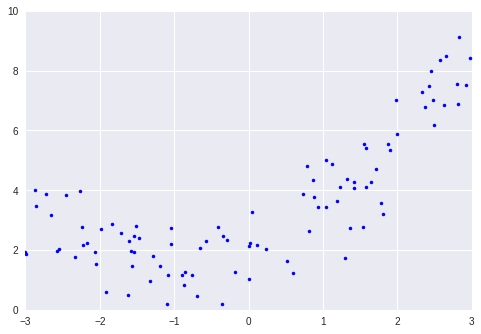

In [18]:
plt.plot(X, y, 'b.')
plt.axis([-3, 3, 0, 10])

In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-1.57118346])

In [20]:
X_poly[0]

array([-1.57118346,  2.46861748])

In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [22]:
lin_reg.intercept_, lin_reg.coef_

(array([1.95414772]), array([[0.91228259, 0.45602661]]))

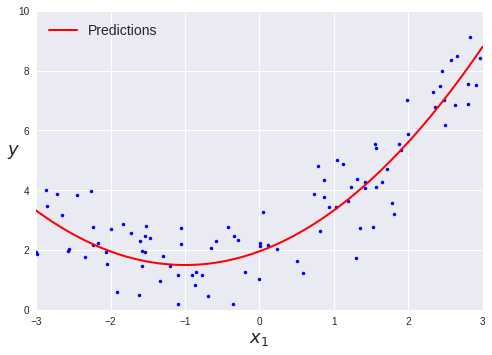

In [23]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## Learning Curves

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        
        train_err = mean_squared_error(y_train_predict, y_train[:m])
        val_err = mean_squared_error(y_val_predict, y_val)
        
        train_errors.append(train_err)
        val_errors.append(val_err)
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

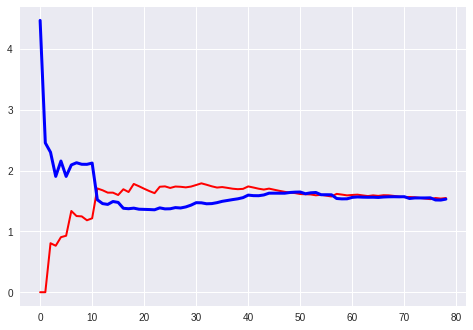

In [25]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [26]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression())
])

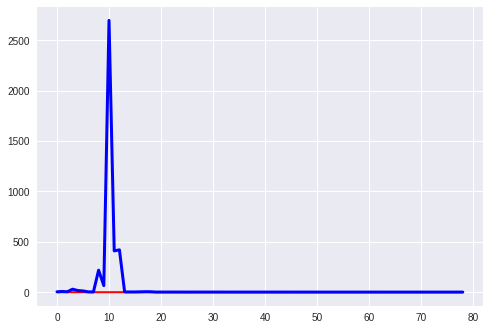

In [27]:
plot_learning_curves(polynomial_regression, X, y)

## Regularization

### Ridge regression

In [28]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)

Ridge(alpha=1, solver='cholesky')

In [29]:
ridge_reg.predict([[1.5]])

array([[4.74701208]])

In [30]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y)

/home/adrian/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SGDRegressor()

In [31]:
sgd_reg.predict([[1.5]])

array([4.71099078])

## Logistic Regression

In [42]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [43]:
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int)

In [46]:
X.shape, y.shape

((150, 1), (150,))

In [47]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

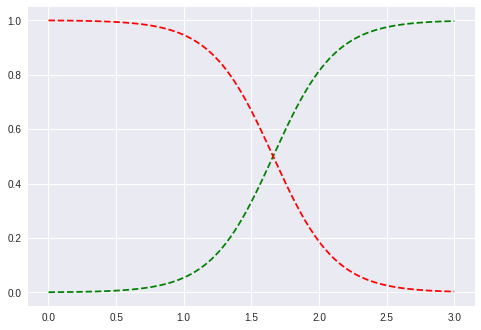

In [50]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], 'g--', label='Iris-Virginica')
plt.plot(X_new, y_proba[:,0], 'r--', label='Not Iris-Virginica')

## Exercise 12

Implement Batch Gradient Descent with early stopping for Softmax Regression
(without using Scikit-Learn).

In [1]:
import numpy as np

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
X = iris['data'][:, (2,3)] # petal length, petal width
y = iris['target']

In [4]:
X = np.c_[np.ones([X.shape[0], 1]), X]

In [5]:
X[:5]

array([[1. , 1.4, 0.2],
       [1. , 1.4, 0.2],
       [1. , 1.3, 0.2],
       [1. , 1.5, 0.2],
       [1. , 1.4, 0.2]])

In [6]:
np.random.seed(2042)

In [7]:
len(X)

150

In [8]:
def train_test_split(X, y, test_ratio, val_ratio):
    test_nrows = int(len(X)*test_ratio)
    val_nrows = int(len(X)*val_ratio)
    train_nrows = int(len(X)-test_nrows-val_nrows)
    indices = np.random.permutation(len(X))
    
    X_train = X[indices[:train_nrows]]
    y_train = y[indices[:train_nrows]]
    
    X_val = X[indices[train_nrows:-test_nrows]]
    y_val = y[indices[train_nrows:-test_nrows]]
    
    X_test = X[indices[-test_nrows:]]
    y_test = y[indices[-test_nrows:]]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [9]:
X_train, y_train, X_val, y_val, X_test, y_test = train_test_split(X, y, 0.2, 0.2)

In [10]:
X_train.shape, X_val.shape, X_test.shape

((90, 3), (30, 3), (30, 3))

In [12]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [21]:
def one_hot_encode(y):
    n_classes = y.max()+1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [22]:
one_hot_encode(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [23]:
y_train_one_hot = one_hot_encode(y_train)
y_val_one_hot = one_hot_encode(y_val)
y_test_one_hot = one_hot_encode(y_test)

### Softmax function

In [43]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [26]:
n_inputs = X_train.shape[1] # == 3 (2 feature plus the bias term)
n_outputs = len(np.unique(y_train)) # == 3 (3 classes)

Training

In [46]:
m = len(X_train)
n_iterations = 5001
eta=0.01

theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(theta)
    y_proba = softmax(logits)
    loss = -np.mean(np.sum(y_train_one_hot * np.log(y_proba + 1e-07), axis=1))
    error = y_proba - y_train_one_hot 
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error)
    theta = theta - eta * gradients

0 3.2078708887337366
500 0.9102655715933008
1000 0.7245981143541181
1500 0.6195736452392622
2000 0.554476455751047
2500 0.510121522324934
3000 0.4775255492382668
3500 0.45217151485803814
4000 0.43159764596466277
4500 0.4143616863014783
5000 0.39956523349383644


In [48]:
theta

array([[ 2.56275724, -1.14381605, -3.07652738],
       [-0.50188025,  0.5140539 ,  0.19257436],
       [-1.13828024,  0.10099209,  2.3453897 ]])

Predictions on validation set

In [49]:
logits = X_val.dot(theta)
y_proba = softmax(logits)
y_pred = np.argmax(y_proba, axis=1)

In [50]:
y_pred

array([0, 2, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1,
       2, 2, 1, 0, 0, 1, 1, 1])

In [51]:
accuracy = np.mean(y_pred == y_val)
accuracy

0.9666666666666667

Adding regularization

In [56]:
m = len(X_train)
n_iterations = 5001
eta=0.1
alpha = 0.1 # regularization parameter

theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(theta)
    y_proba = softmax(logits)
    entropy_loss = -np.mean(np.sum(y_train_one_hot * np.log(y_proba + 1e-07), axis=1))
    l2_loss = 1/2 * np.sum(np.square(theta[1:])) # ridge regression
    loss = entropy_loss + alpha*l2_loss
    error = y_proba - y_train_one_hot 
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * theta[1:]]
    theta = theta - eta * gradients

0 4.389185406058857
500 0.53836117830737
1000 0.5050554328025819
1500 0.4952027953987744
2000 0.4915027487832054
2500 0.4899862970299706
3000 0.4893369827424235
3500 0.4890519457995903
4000 0.48892490834158653
4500 0.48886774370206154
5000 0.48884186032134624


In [57]:
logits = X_val.dot(theta)
y_proba = softmax(logits)
y_pred = np.argmax(y_proba, axis=1)
accuracy = np.mean(y_pred == y_val)
accuracy

1.0

Adding early Stopping

In [63]:
m = len(X_train)
n_iterations = 5001
eta=0.1
alpha = 0.1 # regularization parameter

theta = np.random.randn(n_inputs, n_outputs)
best_loss = np.inf
for iteration in range(n_iterations):
    logits = X_train.dot(theta)
    y_proba = softmax(logits)
    entropy_loss = -np.mean(np.sum(y_train_one_hot * np.log(y_proba + 1e-07), axis=1))
    l2_loss = 1/2 * np.sum(np.square(theta[1:])) # ridge regression
    loss = entropy_loss + alpha*l2_loss
    error = y_proba - y_train_one_hot 
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * theta[1:]]
    theta = theta - eta * gradients
    
    #validation
    logits = X_val.dot(theta)
    y_proba = softmax(logits)
    entropy_loss = -np.mean(np.sum(y_val_one_hot * np.log(y_proba + 1e-07), axis=1))
    l2_loss = 1/2 * np.sum(np.square(theta[1:])) # ridge regression
    loss = entropy_loss + alpha*l2_loss
    
    if iteration % 500 == 0: 
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration, loss, 'early stopping')
        break
    

0 6.4872124921590695
500 0.5715536608931371
1000 0.5429394610892251
1500 0.5354097798477304
2000 0.5331522713122481
2500 0.5325871689258651
2748 0.5325456861924152 early stopping


Now is faster.

In [67]:
logits = X_val.dot(theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_val)
accuracy_score

1.0

Final prediction on the test set

In [68]:
logits = X_test.dot(theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333